<a href="https://colab.research.google.com/github/ashish01012001/cancer_prediction/blob/main/NeuralNetwork_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
dataframe=pd.read_csv('data.csv')
dataframe['sample_425']

KeyError: 'sample_425'

In [4]:
print(dataframe.shape)
dataframe.columns[-1]

(801, 20532)


'gene_20530'

In [5]:
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [7]:
type_cancer=pd.read_csv('labels.csv')
type_cancer

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [8]:
print(type_cancer['Class'].value_counts())

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [24]:
X=dataframe.iloc[:,1:-1]
y=type_cancer.iloc[:,-1]
X


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,7.918774,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.066880,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,9.965236,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,7.018634,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751


In [25]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [26]:
#split data into training,validation and test sets

#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

In [30]:
X_train.shape


(512, 20530)

In [29]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 3.0301 - sparse_categorical_accuracy: 0.2032 - val_loss: 1.4567 - val_sparse_categorical_accuracy: 0.3281
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0681 - sparse_categorical_accuracy: 0.5624 - val_loss: 0.4505 - val_sparse_categorical_accuracy: 0.9375
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4376 - sparse_categorical_accuracy: 0.9377 - val_loss: 0.2439 - val_sparse_categorical_accuracy: 0.9766
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1891 - sparse_categorical_accuracy: 0.9909 - val_loss: 0.1565 - val_sparse_categorical_accuracy: 0.9922
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1491 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.1049 - val_sparse_categorical_accuracy: 0.9922
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0917 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.0756 - val_sparse_categorical_accuracy: 1.0000
Epoc

In [32]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [33]:
accuracy

1.0

In [35]:
predictions[0]

array([6.3759358e-06, 9.9230492e-06, 9.9988610e-01, 5.5350760e-05,
       4.2239953e-05], dtype=float32)

In [36]:
np.argmax(predictions[0])

2

In [37]:
classes

array([0, 1, 2, 3, 4])

In [38]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [39]:
#get the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:2 ,actual:2
predicted:4 ,actual:4
predicted:2 ,actual:2
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:2 ,actual:2
predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:0 ,actual:0


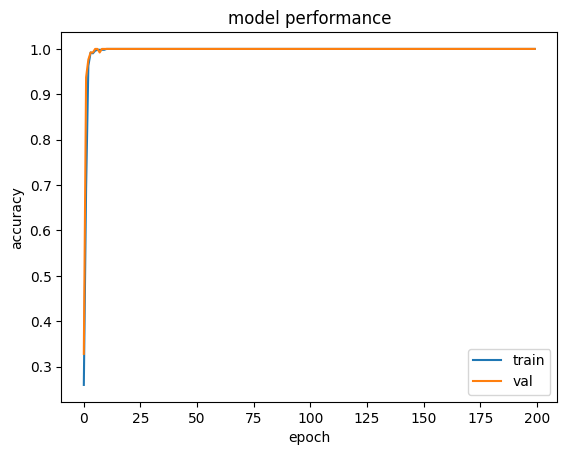

In [40]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

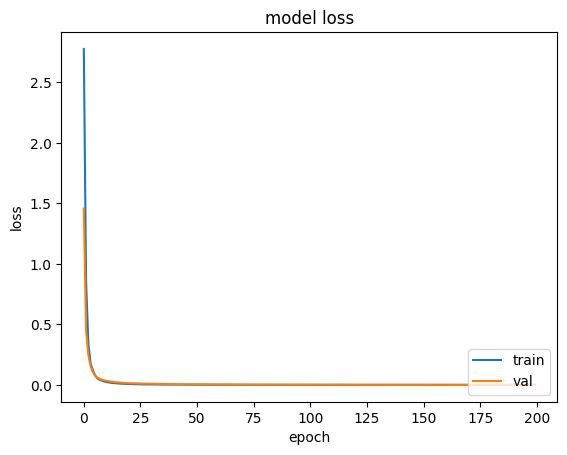

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()